In [110]:
#import pacakges
import numpy as np
import pandas as pd

In [111]:
#Five Stages of the project 
#1Defining a problem
#2Data Processing
#3Modelling
#4Evaluation
#5Deployment



# 1# Data Collection

In [112]:
#read data
data=pd.read_csv('bank.csv')

# BASIC CHECK(Data Cleaning)

In [113]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,NaN,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [114]:
data.shape

(11163, 17)

In [115]:
data.info

<bound method DataFrame.info of        age          job  marital  education fault  balance housing loan  \
0       59       admin.  married  secondary    no     2343     yes   no   
1       59       admin.  married  secondary    no     2343     yes   no   
2       56       admin.  married  secondary    no       45      no   no   
3       41   technician  married  secondary    no     1270     yes   no   
4       55     services  married  secondary    no     2476     yes   no   
...    ...          ...      ...        ...   ...      ...     ...  ...   
11158   33  blue-collar   single    primary    no        1     yes   no   
11159   39     services  married  secondary    no      733      no   no   
11160   32   technician   single  secondary    no       29      no   no   
11161   43   technician  married  secondary    no        0      no  yes   
11162   34   technician  married  secondary    no        0      no   no   

        contact  day month  duration  campaign  pdays  previous pou

In [116]:
#check for duplicates
duplicateRows=data[data.duplicated(keep='last')]

In [117]:
#data=data.drop_duplicates(keep='last',inplace=True)

In [118]:
# null value check
data.isnull().sum()

age          0
job          0
marital      0
education    0
fault        0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64

In [119]:
len(data.index)

11163

In [120]:
# null value check
round(100*data.isna().sum()/len(data.index),2)

age          0.00
job          0.00
marital      0.00
education    0.00
fault        0.00
balance      0.00
housing      0.00
loan         0.00
contact      0.00
day          0.00
month        0.00
duration     0.00
campaign     0.00
pdays        0.00
previous     0.00
poutcome     0.01
deposit      0.00
dtype: float64

In [121]:
# drop null value
data.dropna(subset=['poutcome'],inplace=True)

In [122]:
data.head()


,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Outlier Detection

In [123]:
numerics=['int64']
outlier_chk_features=data.select_dtypes(include=numerics)

In [124]:
data.describe(percentiles=[.25,.50,.80,.90])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.232216,1528.744401,15.658036,371.955743,2.508421,51.330407,0.832557
std,11.913736,3225.391964,8.420740,347.031562,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.250000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
80%,52.000000,2223.000000,24.000000,585.000000,3.000000,95.000000,1.000000
90%,58.000000,3897.600000,28.000000,838.000000,5.000000,191.000000,3.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Examine categorical data

In [125]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   fault      11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [127]:
data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112382,-0.000791,0.000097,-0.005290,0.002763,0.020160
balance,0.112382,1.000000,0.010387,0.022616,-0.013929,0.017381,0.030782
day,-0.000791,0.010387,1.000000,-0.018378,0.137007,-0.077232,-0.058981
duration,0.000097,0.022616,-0.018378,1.000000,-0.041508,-0.027346,-0.026684
campaign,-0.005290,-0.013929,0.137007,-0.041508,1.000000,-0.102726,-0.049699
pdays,0.002763,0.017381,-0.077232,-0.027346,-0.102726,1.000000,0.507272
previous,0.020160,0.030782,-0.058981,-0.026684,-0.049699,0.507272,1.000000


# OPTIMIZATION

In [128]:
# examine unique values
objcol=['job','marital','education','housing']
for col in objcol:
    print(col, '\n' ,data[col].unique())

job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
housing 
 ['yes' 'no']


In [129]:
data.nunique()

age            76
job            12
marital         3
education       4
fault           2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [130]:
data.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Visulazation

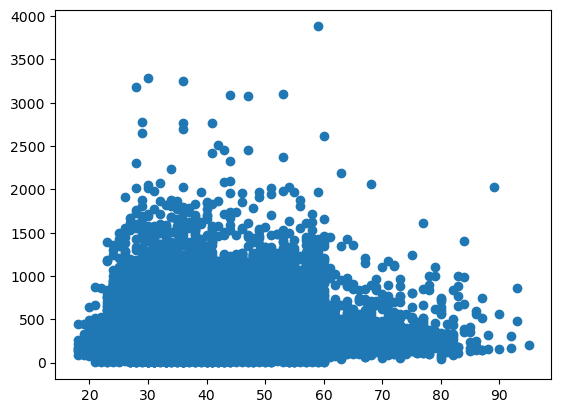

In [131]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(data['age'],data['duration'])

<AxesSubplot:>

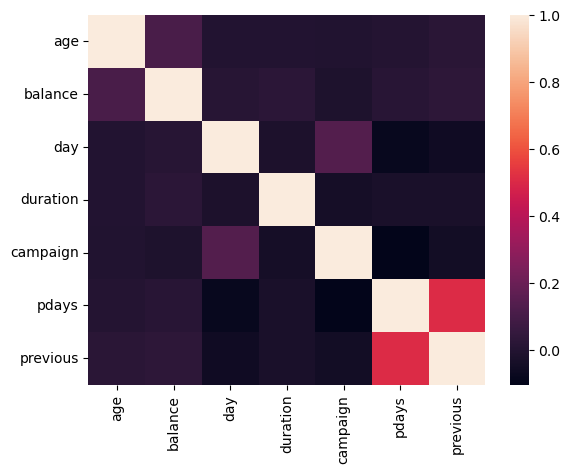

In [132]:
sns.heatmap(data.corr())

<AxesSubplot:>

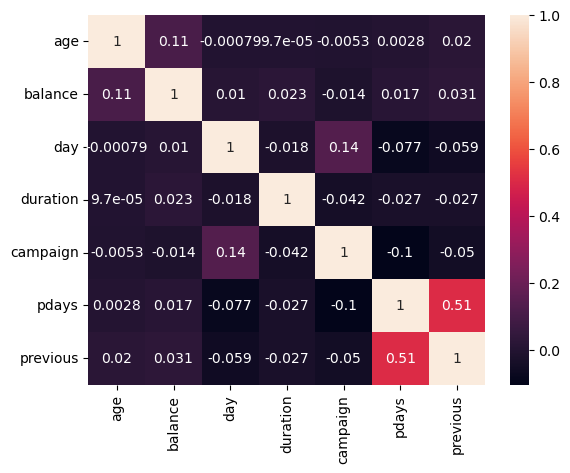

In [133]:
# heatmap with values
sns.heatmap(data.corr(), annot=True) 

Text(0.5, 1.0, 'Bar chart for Contact and Deposite')

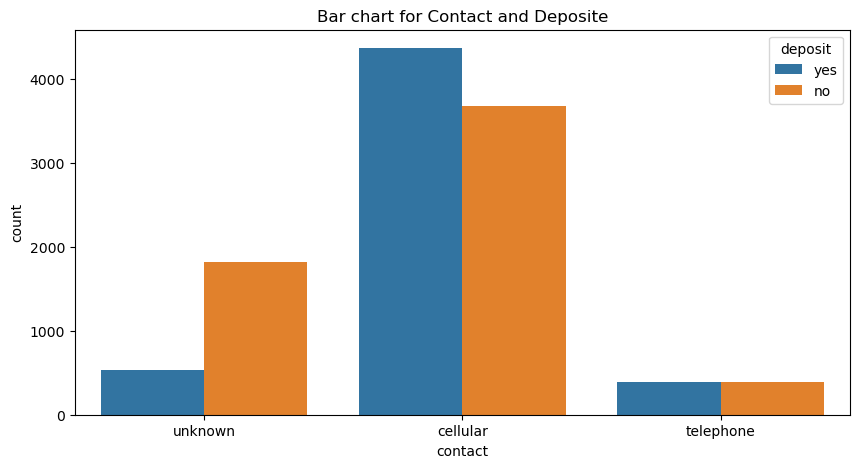

In [134]:
# bar chart
plt.figure(figsize=(10,5))
sns.countplot(x='contact',hue='deposit',data=data)
plt.title('Bar chart for Contact and Deposite')

# feature enginerring( is the process of selecting, transforming, extracting, combining, and manipulating raw data to generate the desired variables for analysis or predictive modeling. It is a crucial step in developing a machine learning model.)

As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

#Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11162
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   fault      11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [136]:
objcol=data.select_dtypes(include=['object']).columns.tolist()
for i in objcol:
    print(i, '\n' ,data[i].unique())

job 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital 
 ['married' 'single' 'divorced']
education 
 ['secondary' 'tertiary' 'primary' 'unknown']
fault 
 ['no' 'yes']
housing 
 ['yes' 'no']
loan 
 ['no' 'yes']
contact 
 ['unknown' 'cellular' 'telephone']
month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 
 ['unknown' 'other' 'failure' 'success']
deposit 
 ['yes' 'no']


In [137]:
# convert binary category to numbers
data['fault'].replace(['yes','no'],[1,0],inplace=True)
data['housing'].replace(['yes','no'],[1,0],inplace=True)
data['loan'].replace(['yes','no'],[1,0],inplace=True)
data['deposit'].replace(['yes','no'],[1,0],inplace=True)

In [138]:
for col in ['fault','housing','loan','deposit']:
    data[col].replace(['yes','no'],[1,0],inplace=True)

In [139]:
data.head(10)

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
3,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
5,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
6,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1
7,56,management,married,tertiary,0,830,1,1,unknown,6,may,1201,1,-1,0,unknown,1
8,60,retired,divorced,secondary,0,545,1,0,unknown,6,may,1030,1,-1,0,unknown,1
9,37,technician,married,secondary,0,1,1,0,unknown,6,may,608,1,-1,0,unknown,1
10,28,services,single,secondary,0,5090,1,0,unknown,6,may,1297,3,-1,0,unknown,1


In [140]:
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [141]:
#Again check the object datatype columns. Let’s find out if there is still any left.

# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [142]:
#matrices
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

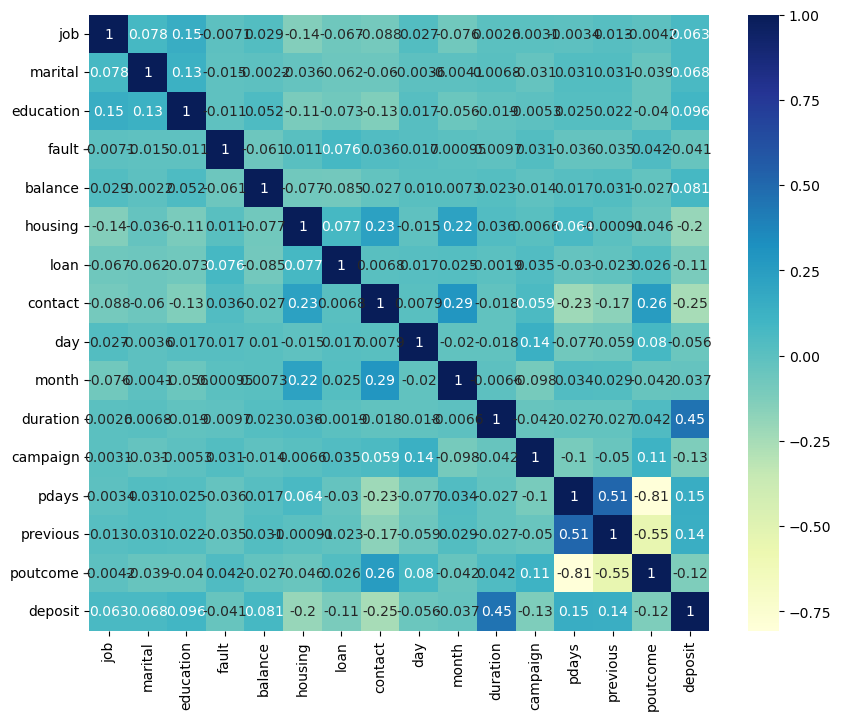

In [143]:
#reruning correlation, with other numeric variables now added

fig, ax = plt.subplots(figsize=(10, 8))
correlations_ML = data.iloc[:,1:].corr() # filer out the Loan_ID column as it is not relevant
sns.heatmap(correlations_ML, cmap="YlGnBu", annot=True)
plt.show()
     


Machine Learning Model Development

In [144]:
X=data.drop(columns='deposit')
Y=data['deposit']

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [146]:
X_train.shape

(7813, 16)

In [147]:
X_test.shape

(3349, 16)

In [148]:
Y_test.shape

(3349,)

In [149]:
Y_train.shape

(7813,)

In [150]:
#LINEAR REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\dgari\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
# make the prediction
y_pred=lr.predict(X_test)
print(y_pred)

[1 0 1 ... 0 0 0]


In [152]:
print(Y_test.values)

[1 0 1 ... 0 0 0]


In [153]:
lr.score(X_test,Y_test)

0.7596297402209615

In [154]:
# Accuracy check
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,Y_test)*100

75.96297402209615

Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc=rfc.fit(X_train,Y_train)

In [156]:
y_pred  =  rfc.predict(X_test)

In [157]:
accuracy_score(y_pred,Y_test)*100

84.92087190206031

KNN classifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

In [159]:
accuracy_score(y_pred,Y_test)*100


73.75335921170499

SUPPORT VECTOR MACHINE

In [160]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [161]:
y_pred=svm.predict(X_test)

In [162]:
accuracy_score(y_pred,Y_test)*100

55.359808898178564

Decision tree classifier

In [163]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy')
Classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Classifier,filled=True)

[Text(0.44129792357860015, 0.984375, 'x[11] <= 206.5\nentropy = 0.998\nsamples = 7813\nvalue = [4104, 3709]'),
 Text(0.13673212549814284, 0.953125, 'x[11] <= 88.5\nentropy = 0.741\nsamples = 3139\nvalue = [2481, 658]'),
 Text(0.02886326704325621, 0.921875, 'x[11] <= 77.5\nentropy = 0.256\nsamples = 974\nvalue = [932, 42]'),
 Text(0.012381026077536175, 0.890625, 'x[13] <= 47.5\nentropy = 0.165\nsamples = 779\nvalue = [760, 19]'),
 Text(0.0074286156465217055, 0.859375, 'x[12] <= 3.5\nentropy = 0.104\nsamples = 658\nvalue = [649, 9]'),
 Text(0.006190513038768088, 0.828125, 'x[5] <= 180.0\nentropy = 0.153\nsamples = 407\nvalue = [398, 9]'),
 Text(0.004952410431014471, 0.796875, 'entropy = 0.0\nsamples = 138\nvalue = [138, 0]'),
 Text(0.0074286156465217055, 0.796875, 'x[0] <= 29.5\nentropy = 0.211\nsamples = 269\nvalue = [260, 9]'),
 Text(0.004952410431014471, 0.765625, 'x[10] <= 8.5\nentropy = 0.684\nsamples = 22\nvalue = [18, 4]'),
 Text(0.0037143078232608527, 0.734375, 'x[10] <= 5.5\nent

In [ ]:
y_pred=Classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,Y_test)*100

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(classification_report(y_pred,Y_test))

Random Forest Classifier is giving the best accuracy with an accuracy score of 84% for the testing dataset.